# Comparison of two dataset
Here we compare two rainfall dataset with each other. The first is a satellite observation dataset, the so called [HOAPS climatology](http://www.hoaps.org) and the second is a CMIP5 model results. Both dataset are already regridded to the same spatial grid (T63)

In [3]:
# read in the data
from pycmbs.data import Data
h_file = 'hoaps-g.t63.m01.rain.1987-2008_monmean.nc'
m_file = 'pr_Amon_MPI-ESM-LR_amip_r1i1p1_197901-200812_2000-01-01_2007-09-30_T63_monmean.nc'

hoaps = Data(h_file, 'rain', read=True)  
model = Data(m_file, 'pr', read=True, scale_factor=86400.) # note the scale factor to convert directly to [mm/d]
model.unit = '$mm d^{-1}$'

Now we compare the two dataset by different means.

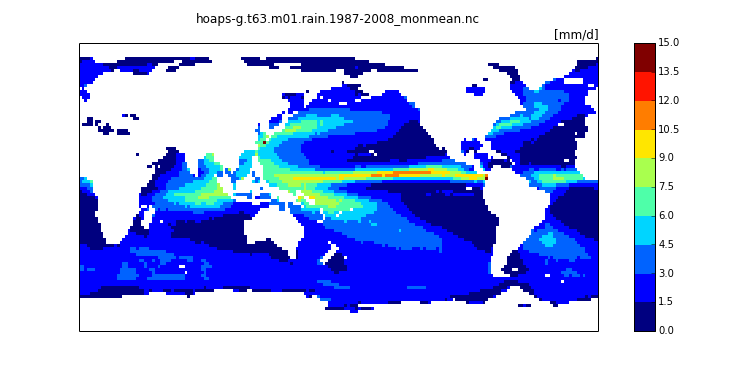

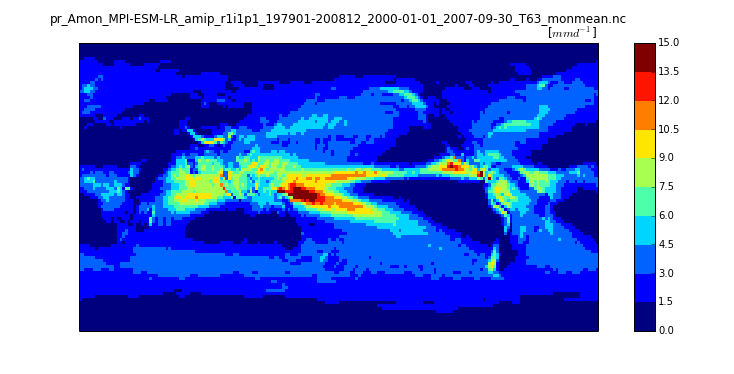

In [4]:
%matplotlib inline
# initial plotting
from pycmbs.mapping import map_plot

vmin=0.
vmax=15.
f = map_plot(hoaps,vmin=vmin,vmax=vmax)
f = map_plot(model,vmin=vmin,vmax=vmax)

From this we see that one dataset covers the entire earth, while the second one only the free ocean. We would therefore like to apply a consistent mask to both of them.

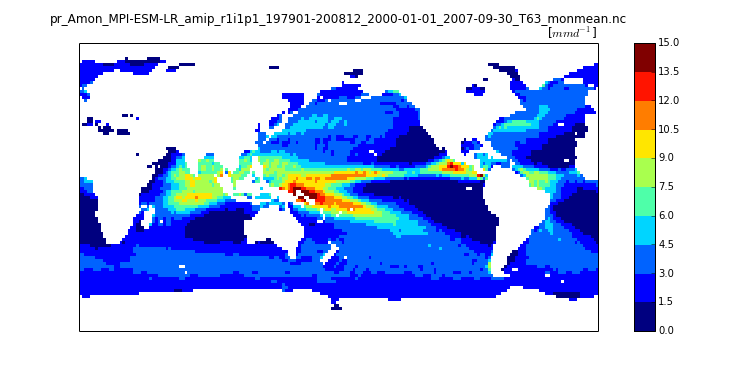

In [5]:
msk = hoaps.get_valid_mask(frac=0.1)  # at least 10% of valid data for all timesteps
model._apply_mask(msk)
hoaps._apply_mask(msk)  # apply mask also to HOAPS dataset to be entirely consistent
f = map_plot(model,vmin=vmin,vmax=vmax)

Let's have a look on the temporal mean differences first

INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine
INFO: The backend has been automatically switched to CARTOPY as this provides higher quality and faster plotting on your machine


/usr/local/lib/python2.7/dist-packages/cartopy/crs.py:1211: UserWarning: The Robinson projection in the v4.8.x series of Proj.4 contains a discontinuity at 40 deg latitude. Use this projection with caution.
  warnings.warn('The Robinson projection in the v4.8.x series '


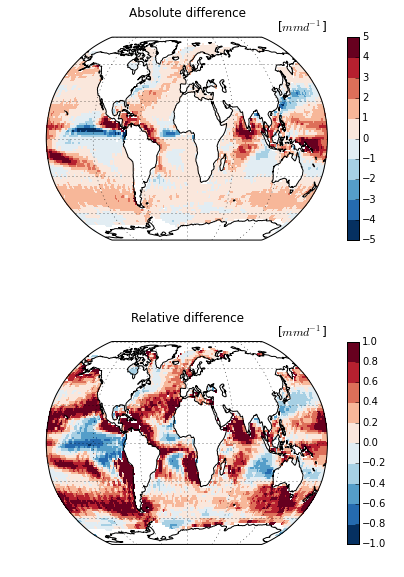

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

model_m = model.timmean(return_object=True)
hoaps_m = hoaps.timmean(return_object=True)
xx = map_plot(model_m.sub(hoaps_m,copy=True),ax=ax1,cmap_data='RdBu_r',vmin=-5.,vmax=5., use_basemap=True, title='Absolute difference')
xx = map_plot(model_m.sub(hoaps_m,copy=True).div(hoaps_m,copy=True),ax=ax2,cmap_data='RdBu_r',vmin=-1.,vmax=1., use_basemap=True, title='Relative difference')



In [7]:
fig.savefig('precipitation_difference.pdf', bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/matplotlib-1.3.1-py2.7-linux-x86_64.egg/matplotlib/backends/backend_pdf.py:2184: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


In [8]:
fig.savefig('precipitation_difference.png', bbox_inches='tight', dpi=200)

### Scatterplot

An easy scatterplot is generated using the ScatterPlot class. Here we need to provide a reference Dataset as as independent variable. All other datasets are then refrend to that reference.

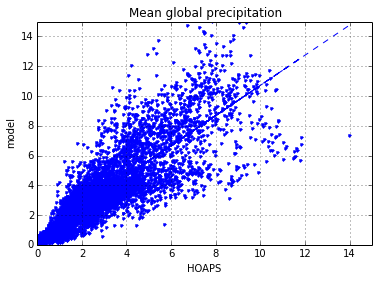

In [26]:
from pycmbs.plots import ScatterPlot
S = ScatterPlot(hoaps_m)
S.plot(model_m,fldmean=False)
S.ax.grid()
S.ax.set_xlim(0.,15.)
S.ax.set_ylim(S.ax.get_xlim())
S.ax.set_title('Mean global precipitation')
S.ax.set_ylabel('model')
S.ax.set_xlabel('HOAPS')
S.ax.figure.savefig('scatterplot.png')

### Timeseries

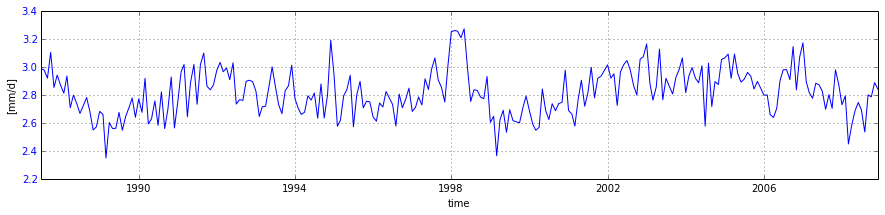

In [40]:
from pycmbs.plots import LinePlot
f = plt.figure(figsize=(15,3))
ax = f.add_subplot(111)
L = LinePlot(ax=ax,regress=False)
L.plot(hoaps)
ax.grid()
f.savefig('time_series.png')